#**Import Libraries**

In [1]:
import torch
import tensorflow as tf
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D,Flatten, Dense,  Dropout
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

#**Part 1**

##**Import Data**

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


##**PLot Images**

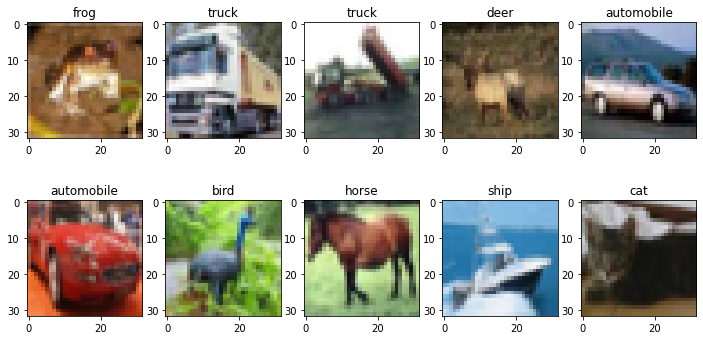

In [ ]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=[12, 6])
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train_full[i])
  plt.title(labels[y_train_full[i][0]])

##**Preprocessing**

In [3]:
x_train,x_validation,y_train,y_validation=train_test_split(x_train_full, y_train_full,test_size=0.1)

In [4]:
#Normalize
x_train=x_train/255
x_validation=x_validation/255
x_test=x_test/255

##**Building Multi Layer Perceptron**

In [ ]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#Buildibg Layers (Activation Functions: a1=ReLU, a2=ReLU)
model1 = Sequential([
    Flatten(input_shape = (32, 32, 3)),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax'),])

In [ ]:
#Buildibg Layers (Activation Functions: a1=selu, a2=selu)
model2 = Sequential([
    Flatten(input_shape = (32, 32, 3)),
    Dense(300, activation='selu'),
    Dense(100, activation='selu'),
    Dense(10, activation='softmax'),])

In [ ]:
#Buildibg Layers (Activation Functions: a1=sigmoid, a2=sigmoid)
model3 = Sequential([
    Flatten(input_shape = (32, 32, 3)),
    Dense(300, activation='sigmoid'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax'),])

In [ ]:
#Buildibg Layers (Activation Functions: a1=tanh, a2=tanh)
model4 = Sequential([
    Flatten(input_shape = (32, 32, 3)),
    Dense(200, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(10, activation='softmax'),])

##**Required Functions**

In [5]:
def plotting_acc_loss(acc,acc_val,loss,val_loss,batch_size):
  plt.figure(figsize=(8,4))
  plt.subplot(1,2,1)
  plt.plot(np.arange(15),acc,
       "b", label = 'Training Dataset Accrucay')
  plt.plot(np.arange(15),acc_val,
       "r", label = 'Validation Set Accrucay')
  plt.title(f'Accuracy in MLP (batch size = {batch_size})')
  plt.xlabel('Epoch')
  plt.legend(loc='upper left')

  plt.subplot(1,2,2)
  plt.plot(np.arange(15),loss,
       "b", label = 'Training Dataset Loss')
  plt.plot(np.arange(15),val_loss,
       "r", label = 'Validation Set Loss')
  plt.title(f'Loss in MLP (batch size = {batch_size})')
  plt.xlabel('Epoch')
  plt.legend(loc='upper left')
  plt.show()

In [6]:
def plotting_cnn(acc,acc_val,loss,val_loss,batch_size,epochs):
  plt.figure(figsize=(8,4))
  plt.subplot(1,2,1)
  plt.plot(np.arange(epochs),acc,
       "b", label = 'Training Dataset Accrucay')
  plt.plot(np.arange(epochs),acc_val,
       "r", label = 'Validation Set Accrucay')
  plt.title(f'Accuracy in CNN (batch size = {batch_size})')
  plt.xlabel('Epoch')
  plt.legend(loc='upper left')

  plt.subplot(1,2,2)
  plt.plot(np.arange(epochs),loss,
       "b", label = 'Training Dataset Loss')
  plt.plot(np.arange(epochs),val_loss,
       "r", label = 'Validation Set Loss')
  plt.title(f'Loss in CNN (batch size = {batch_size})')
  plt.xlabel('Epoch')
  plt.legend(loc='upper left')
  plt.show()

##**Training the Model**

In [ ]:
#batch size = 32
model1.compile(optimizer='SGD',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, epochs = 15, batch_size = 32, validation_data = (x_validation, y_validation))

Epoch 1/15


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1407/1407 [==============================] - 22s 16ms/step - loss: 1.8869 - accuracy: 0.3239 - val_loss: 1.7735 - val_accuracy: 0.3720
Epoch 2/15
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7054 - accuracy: 0.3943 - val_loss: 1.7848 - val_accuracy: 0.3534
Epoch 3/15
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6228 - accuracy: 0.4250 - val_loss: 2.1113 - val_accuracy: 0.2842
Epoch 4/15
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5663 - accuracy: 0.4448 - val_loss: 1.6902 - val_accuracy: 0.3854
Epoch 5/15
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5226 - accuracy: 0.4613 - val_loss: 1.6593 - val_accuracy: 0.3974
Epoch 6/15
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4828 - accuracy: 0.4747 - val_loss: 1.6651 - val_accuracy: 0.3970
Epoch 7/15
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4525 - accuracy: 0.4852 - val_loss: 1.7022 - val_accuracy: 0.

In [ ]:
#batch size = 64
model1.compile(optimizer='SGD',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
history21 = model1.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_data = (x_validation, y_validation))

Epoch 1/15


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


704/704 [==============================] - 8s 11ms/step - loss: 1.0277 - accuracy: 0.6397 - val_loss: 2.1822 - val_accuracy: 0.3804
Epoch 2/15
704/704 [==============================] - 8s 12ms/step - loss: 1.0171 - accuracy: 0.6434 - val_loss: 1.7569 - val_accuracy: 0.4288
Epoch 3/15
704/704 [==============================] - 7s 10ms/step - loss: 1.0096 - accuracy: 0.6444 - val_loss: 1.4981 - val_accuracy: 0.4900
Epoch 4/15
704/704 [==============================] - 8s 11ms/step - loss: 0.9996 - accuracy: 0.6495 - val_loss: 1.6110 - val_accuracy: 0.4628
Epoch 5/15
704/704 [==============================] - 9s 13ms/step - loss: 0.9915 - accuracy: 0.6534 - val_loss: 1.6779 - val_accuracy: 0.4470
Epoch 6/15
704/704 [==============================] - 7s 10ms/step - loss: 0.9829 - accuracy: 0.6570 - val_loss: 1.6812 - val_accuracy: 0.4666
Epoch 7/15
704/704 [==============================] - 8s 12ms/step - loss: 0.9751 - accuracy: 0.6598 - val_loss: 1.6627 - val_accuracy: 0.4736
Epoch 8/15

In [ ]:
#batch size = 256
model1.compile(optimizer='SGD',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
history3 = model1.fit(x_train, y_train, epochs = 15 , batch_size = 256, validation_data = (x_validation, y_validation))

Epoch 1/15
176/176 [==============================] - 5s 27ms/step - loss: 0.8100 - accuracy: 0.7222 - val_loss: 1.3347 - val_accuracy: 0.5536
Epoch 2/15
176/176 [==============================] - 5s 26ms/step - loss: 0.8034 - accuracy: 0.7263 - val_loss: 1.3332 - val_accuracy: 0.5606
Epoch 3/15
176/176 [==============================] - 5s 26ms/step - loss: 0.7967 - accuracy: 0.7296 - val_loss: 1.3828 - val_accuracy: 0.5430
Epoch 4/15
176/176 [==============================] - 5s 26ms/step - loss: 0.7946 - accuracy: 0.7284 - val_loss: 1.3328 - val_accuracy: 0.5554
Epoch 5/15
176/176 [==============================] - 5s 26ms/step - loss: 0.7908 - accuracy: 0.7312 - val_loss: 1.3417 - val_accuracy: 0.5564
Epoch 6/15
176/176 [==============================] - 5s 26ms/step - loss: 0.7873 - accuracy: 0.7338 - val_loss: 1.3309 - val_accuracy: 0.5576
Epoch 7/15
176/176 [==============================] - 5s 26ms/step - loss: 0.7830 - accuracy: 0.7350 - val_loss: 1.3556 - val_accuracy: 0.5470

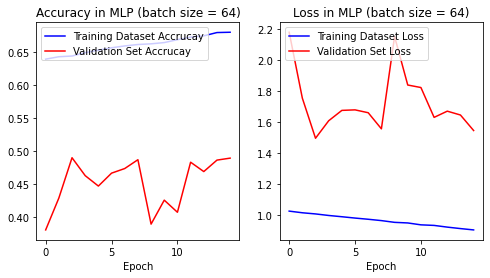

In [ ]:
plotting_acc_loss(history21.history['accuracy'],history21.history['val_accuracy']
                 ,history21.history['loss'],history21.history['val_loss'],64)

313/313 [==============================] - 1s 4ms/step


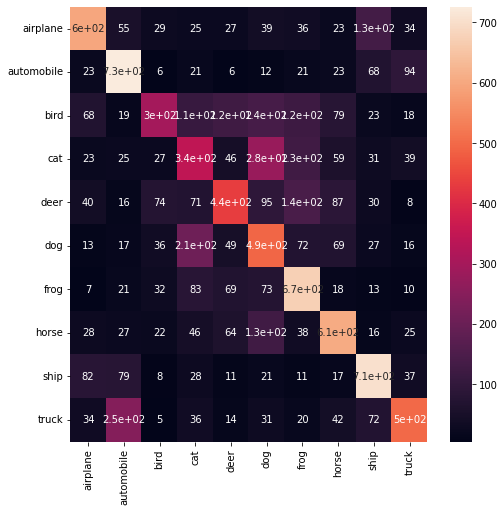

In [ ]:
pred21 = model1.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred_labels21=np.argmax(pred21, axis=1)
plt.figure(figsize=(8,8))
cm21 = confusion_matrix(y_test,pred_labels21)
sns.heatmap(cm21, annot=True,  xticklabels = labels, yticklabels = labels)

In [ ]:
#batch size= 64
#Activation Functions: a1=selu, a2=selu
model2.compile(optimizer='SGD',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
history22=model2.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_data = (x_validation, y_validation))

Epoch 1/15


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


704/704 [==============================] - 6s 8ms/step - loss: 1.9645 - accuracy: 0.2985 - val_loss: 2.6280 - val_accuracy: 0.2176
Epoch 2/15
704/704 [==============================] - 6s 8ms/step - loss: 1.7760 - accuracy: 0.3730 - val_loss: 2.0234 - val_accuracy: 0.2914
Epoch 3/15
704/704 [==============================] - 6s 8ms/step - loss: 1.7020 - accuracy: 0.3970 - val_loss: 2.4011 - val_accuracy: 0.2414
Epoch 4/15
704/704 [==============================] - 6s 8ms/step - loss: 1.6505 - accuracy: 0.4183 - val_loss: 1.7962 - val_accuracy: 0.3578
Epoch 5/15
704/704 [==============================] - 6s 8ms/step - loss: 1.6093 - accuracy: 0.4327 - val_loss: 1.8535 - val_accuracy: 0.3244
Epoch 6/15
704/704 [==============================] - 6s 8ms/step - loss: 1.5768 - accuracy: 0.4448 - val_loss: 1.7378 - val_accuracy: 0.3698
Epoch 7/15
704/704 [==============================] - 6s 8ms/step - loss: 1.5520 - accuracy: 0.4546 - val_loss: 1.6373 - val_accuracy: 0.4158
Epoch 8/15
704/70

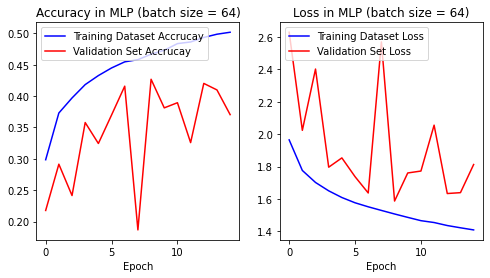

In [ ]:
plotting_acc_loss(history22.history['accuracy'],history22.history['val_accuracy']
                 ,history22.history['loss'],history22.history['val_loss'],64)

313/313 [==============================] - 1s 3ms/step


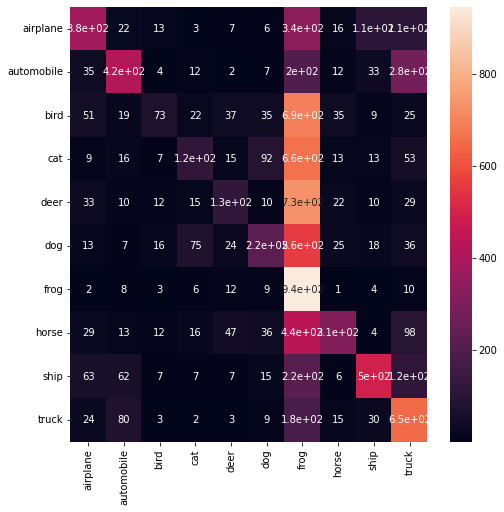

In [ ]:
pred22 = model2.predict(x_test)
pred_labels22=np.argmax(pred22, axis=1)
plt.figure(figsize=(8,8))
cm22 = confusion_matrix(y_test,pred_labels22)
sns.heatmap(cm22, annot=True,  xticklabels = labels, yticklabels = labels)

In [ ]:
#batch size= 64
#Activation Functions: a1=sigmoid, a2=sigmoid
model3.compile(optimizer='SGD',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
history23=model3.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_data = (x_validation, y_validation))

Epoch 1/15


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


704/704 [==============================] - 6s 8ms/step - loss: 2.1288 - accuracy: 0.2472 - val_loss: 1.9999 - val_accuracy: 0.2952
Epoch 2/15
704/704 [==============================] - 5s 8ms/step - loss: 1.9490 - accuracy: 0.3173 - val_loss: 1.9181 - val_accuracy: 0.3072
Epoch 3/15
704/704 [==============================] - 5s 8ms/step - loss: 1.8792 - accuracy: 0.3420 - val_loss: 1.8420 - val_accuracy: 0.3478
Epoch 4/15
704/704 [==============================] - 5s 8ms/step - loss: 1.8397 - accuracy: 0.3551 - val_loss: 1.8655 - val_accuracy: 0.3180
Epoch 5/15
704/704 [==============================] - 5s 8ms/step - loss: 1.8100 - accuracy: 0.3661 - val_loss: 1.8272 - val_accuracy: 0.3438
Epoch 6/15
704/704 [==============================] - 5s 7ms/step - loss: 1.7868 - accuracy: 0.3751 - val_loss: 1.8183 - val_accuracy: 0.3442
Epoch 7/15
704/704 [==============================] - 5s 7ms/step - loss: 1.7667 - accuracy: 0.3811 - val_loss: 1.8576 - val_accuracy: 0.3252
Epoch 8/15
704/70

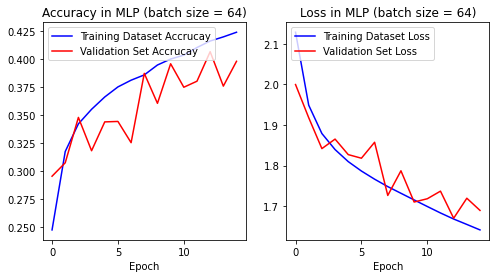

In [ ]:
plotting_acc_loss(history23.history['accuracy'],history23.history['val_accuracy']
                 ,history23.history['loss'],history23.history['val_loss'],64)

313/313 [==============================] - 1s 3ms/step


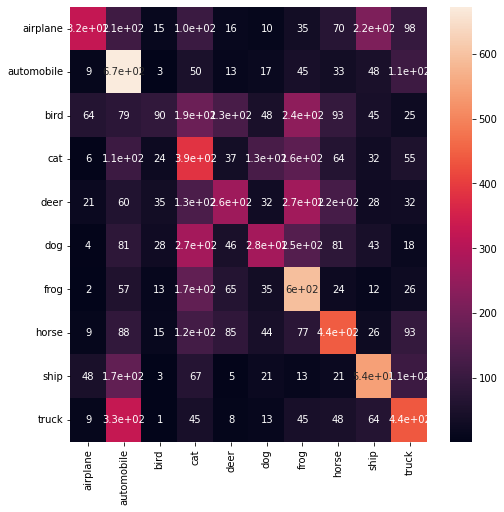

In [ ]:
pred23 = model3.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred_labels23=np.argmax(pred23, axis=1)
plt.figure(figsize=(8,8))
cm23 = confusion_matrix(y_test,pred_labels23)
sns.heatmap(cm23, annot=True,  xticklabels = labels, yticklabels = labels)

In [ ]:
#batch size= 64
#Activation Functions: a1=tanh, a2=tanh
model4.compile(optimizer='SGD',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
history24=model4.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_data = (x_validation, y_validation))

Epoch 1/15


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


704/704 [==============================] - 6s 8ms/step - loss: 1.9257 - accuracy: 0.3126 - val_loss: 2.0593 - val_accuracy: 0.2430
Epoch 2/15
704/704 [==============================] - 5s 7ms/step - loss: 1.7752 - accuracy: 0.3735 - val_loss: 2.2109 - val_accuracy: 0.2028
Epoch 3/15
704/704 [==============================] - 5s 7ms/step - loss: 1.7146 - accuracy: 0.3996 - val_loss: 2.0313 - val_accuracy: 0.2478
Epoch 4/15
704/704 [==============================] - 5s 7ms/step - loss: 1.6690 - accuracy: 0.4138 - val_loss: 1.9007 - val_accuracy: 0.3256
Epoch 5/15
704/704 [==============================] - 5s 8ms/step - loss: 1.6312 - accuracy: 0.4258 - val_loss: 1.6981 - val_accuracy: 0.3812
Epoch 6/15
704/704 [==============================] - 5s 7ms/step - loss: 1.5997 - accuracy: 0.4360 - val_loss: 2.1800 - val_accuracy: 0.2668
Epoch 7/15
704/704 [==============================] - 5s 7ms/step - loss: 1.5746 - accuracy: 0.4450 - val_loss: 1.6914 - val_accuracy: 0.4130
Epoch 8/15
704/70

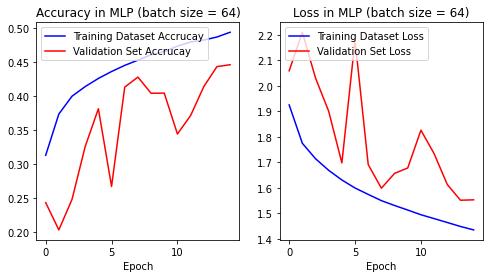

In [ ]:
plotting_acc_loss(history24.history['accuracy'],history24.history['val_accuracy']
                 ,history24.history['loss'],history24.history['val_loss'],64)

313/313 [==============================] - 1s 3ms/step


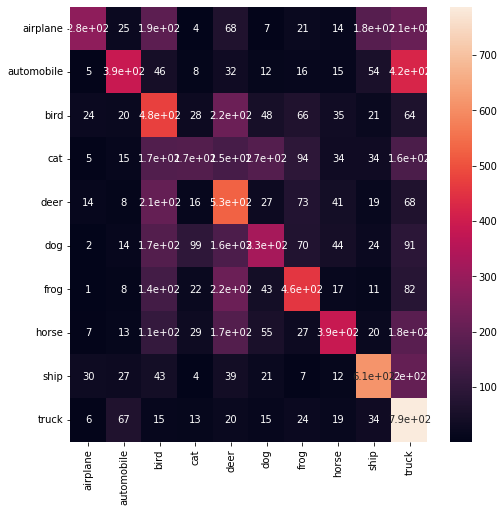

In [ ]:
pred24 = model4.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred_labels24=np.argmax(pred24, axis=1)
plt.figure(figsize=(8,8))
cm24 = confusion_matrix(y_test,pred_labels24)
sns.heatmap(cm24, annot=True,  xticklabels = labels, yticklabels = labels)

In [ ]:
model1.compile(optimizer='SGD',loss='mean_absolute_error', metrics=['accuracy'])
history25 = model1.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_data = (x_validation, y_validation))

Epoch 1/15
704/704 [==============================] - 6s 8ms/step - loss: 4.4171 - accuracy: 0.6436 - val_loss: 4.4462 - val_accuracy: 0.5396
Epoch 2/15
704/704 [==============================] - 6s 8ms/step - loss: 4.4171 - accuracy: 0.6436 - val_loss: 4.4462 - val_accuracy: 0.5396
Epoch 3/15
704/704 [==============================] - 5s 7ms/step - loss: 4.4171 - accuracy: 0.6436 - val_loss: 4.4462 - val_accuracy: 0.5396
Epoch 4/15
704/704 [==============================] - 5s 7ms/step - loss: 4.4171 - accuracy: 0.6436 - val_loss: 4.4462 - val_accuracy: 0.5396
Epoch 5/15
704/704 [==============================] - 5s 7ms/step - loss: 4.4171 - accuracy: 0.6436 - val_loss: 4.4462 - val_accuracy: 0.5396
Epoch 6/15
704/704 [==============================] - 5s 7ms/step - loss: 4.4171 - accuracy: 0.6436 - val_loss: 4.4462 - val_accuracy: 0.5396
Epoch 7/15
704/704 [==============================] - 5s 7ms/step - loss: 4.4171 - accuracy: 0.6436 - val_loss: 4.4462 - val_accuracy: 0.5396
Epoch 

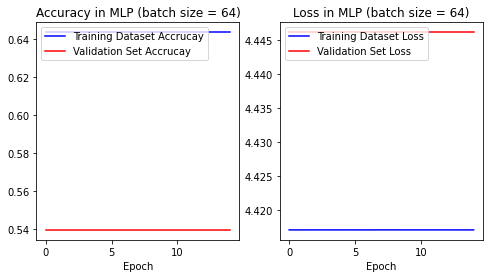

In [ ]:
plotting_acc_loss(history25.history['accuracy'],history25.history['val_accuracy']
                 ,history25.history['loss'],history25.history['val_loss'],64)

313/313 [==============================] - 1s 3ms/step


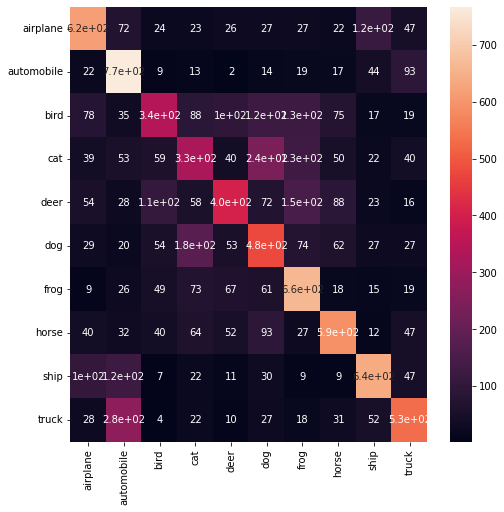

In [ ]:
pred25 = model1.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred_labels25=np.argmax(pred25, axis=1)
plt.figure(figsize=(8,8))
cm25 = confusion_matrix(y_test,pred_labels25)
sns.heatmap(cm25, annot=True,  xticklabels = labels, yticklabels = labels)

In [ ]:
model1.compile(optimizer='SGD',loss='mean_squared_error', metrics=['accuracy'])
history26 = model1.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_data = (x_validation, y_validation))

Epoch 1/15
704/704 [==============================] - 6s 8ms/step - loss: 27.6097 - accuracy: 0.4728 - val_loss: 27.8250 - val_accuracy: 0.3174
Epoch 2/15
704/704 [==============================] - 5s 7ms/step - loss: 27.5984 - accuracy: 0.3544 - val_loss: 27.8187 - val_accuracy: 0.2586
Epoch 3/15
704/704 [==============================] - 5s 7ms/step - loss: 27.5943 - accuracy: 0.2895 - val_loss: 27.8162 - val_accuracy: 0.2140
Epoch 4/15
704/704 [==============================] - 5s 7ms/step - loss: 27.5925 - accuracy: 0.2491 - val_loss: 27.8149 - val_accuracy: 0.1952
Epoch 5/15
704/704 [==============================] - 5s 7ms/step - loss: 27.5915 - accuracy: 0.2249 - val_loss: 27.8141 - val_accuracy: 0.1770
Epoch 6/15
704/704 [==============================] - 5s 7ms/step - loss: 27.5908 - accuracy: 0.2058 - val_loss: 27.8136 - val_accuracy: 0.1638
Epoch 7/15
704/704 [==============================] - 5s 7ms/step - loss: 27.5904 - accuracy: 0.1922 - val_loss: 27.8132 - val_accuracy:

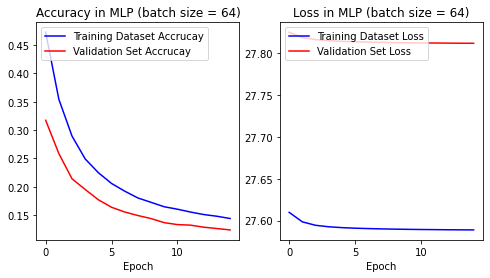

In [ ]:
plotting_acc_loss(history26.history['accuracy'],history26.history['val_accuracy']
                 ,history26.history['loss'],history26.history['val_loss'],64)

313/313 [==============================] - 1s 3ms/step


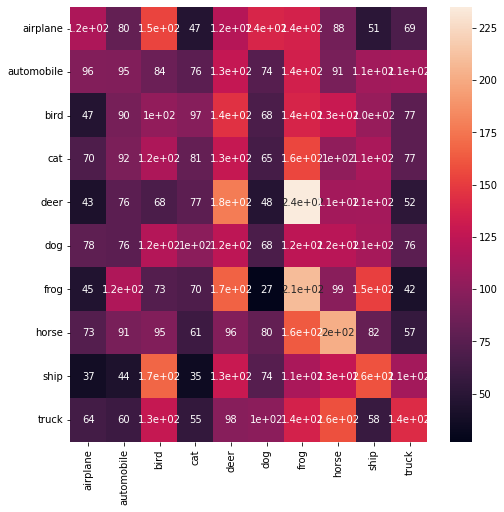

In [ ]:
pred26 = model1.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred_labels26=np.argmax(pred26, axis=1)
plt.figure(figsize=(8,8))
cm26 = confusion_matrix(y_test,pred_labels26)
sns.heatmap(cm26, annot=True,  xticklabels = labels, yticklabels = labels)

In [ ]:
model1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
history27 = model1.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_data = (x_validation, y_validation))

Epoch 1/15


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


704/704 [==============================] - 7s 9ms/step - loss: 1.6915 - accuracy: 0.3908 - val_loss: 1.6232 - val_accuracy: 0.4190
Epoch 2/15
704/704 [==============================] - 7s 10ms/step - loss: 1.5746 - accuracy: 0.4369 - val_loss: 1.5751 - val_accuracy: 0.4360
Epoch 3/15
704/704 [==============================] - 6s 9ms/step - loss: 1.5250 - accuracy: 0.4570 - val_loss: 1.5334 - val_accuracy: 0.4546
Epoch 4/15
704/704 [==============================] - 6s 9ms/step - loss: 1.4862 - accuracy: 0.4692 - val_loss: 1.5223 - val_accuracy: 0.4518
Epoch 5/15
704/704 [==============================] - 6s 9ms/step - loss: 1.4495 - accuracy: 0.4799 - val_loss: 1.4944 - val_accuracy: 0.4690
Epoch 6/15
704/704 [==============================] - 6s 9ms/step - loss: 1.4257 - accuracy: 0.4901 - val_loss: 1.5042 - val_accuracy: 0.4752
Epoch 7/15
704/704 [==============================] - 6s 9ms/step - loss: 1.4091 - accuracy: 0.4982 - val_loss: 1.4703 - val_accuracy: 0.4834
Epoch 8/15
704/7

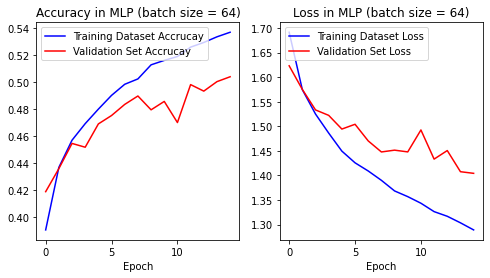

In [ ]:
plotting_acc_loss(history27.history['accuracy'],history27.history['val_accuracy']
                 ,history27.history['loss'],history27.history['val_loss'],64)

In [ ]:
model1.compile(optimizer='RMSprop',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
history28 = model1.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_data = (x_validation, y_validation))

Epoch 1/15
704/704 [==============================] - 9s 11ms/step - loss: 2.0498 - accuracy: 0.1906 - val_loss: 2.0439 - val_accuracy: 0.1950
Epoch 2/15
704/704 [==============================] - 8s 11ms/step - loss: 2.0498 - accuracy: 0.1896 - val_loss: 2.0449 - val_accuracy: 0.1926
Epoch 3/15
704/704 [==============================] - 8s 11ms/step - loss: 2.0504 - accuracy: 0.1920 - val_loss: 2.0422 - val_accuracy: 0.1946
Epoch 4/15
704/704 [==============================] - 8s 11ms/step - loss: 2.0484 - accuracy: 0.1888 - val_loss: 2.0601 - val_accuracy: 0.1946
Epoch 5/15
704/704 [==============================] - 8s 11ms/step - loss: 2.0476 - accuracy: 0.1914 - val_loss: 2.0507 - val_accuracy: 0.1962
Epoch 6/15
704/704 [==============================] - 10s 14ms/step - loss: 2.0465 - accuracy: 0.1898 - val_loss: 2.0592 - val_accuracy: 0.1952
Epoch 7/15
704/704 [==============================] - 8s 11ms/step - loss: 2.0462 - accuracy: 0.1927 - val_loss: 2.0556 - val_accuracy: 0.191

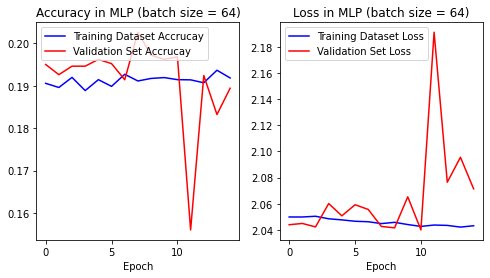

In [ ]:
plotting_acc_loss(history28.history['accuracy'],history28.history['val_accuracy']
                 ,history28.history['loss'],history28.history['val_loss'],64)

##**Calculate Precision, Recall and F-Score**

In [ ]:
model1.compile(optimizer='SGD',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
history = model1.fit(x_train, y_train, epochs = 15 , batch_size = 256, validation_data = (x_validation, y_validation))

Epoch 1/15
176/176 [==============================] - 8s 38ms/step - loss: 0.7557 - accuracy: 0.7432 - val_loss: 1.3562 - val_accuracy: 0.5542
Epoch 2/15
176/176 [==============================] - 4s 25ms/step - loss: 0.7507 - accuracy: 0.7474 - val_loss: 1.3893 - val_accuracy: 0.5446
Epoch 3/15
176/176 [==============================] - 5s 26ms/step - loss: 0.7493 - accuracy: 0.7480 - val_loss: 1.3834 - val_accuracy: 0.5496
Epoch 4/15
176/176 [==============================] - 5s 26ms/step - loss: 0.7435 - accuracy: 0.7486 - val_loss: 1.3714 - val_accuracy: 0.5474
Epoch 5/15
176/176 [==============================] - 6s 33ms/step - loss: 0.7433 - accuracy: 0.7472 - val_loss: 1.4048 - val_accuracy: 0.5360
Epoch 6/15
176/176 [==============================] - 6s 33ms/step - loss: 0.7363 - accuracy: 0.7524 - val_loss: 1.4026 - val_accuracy: 0.5418
Epoch 7/15
176/176 [==============================] - 5s 26ms/step - loss: 0.7403 - accuracy: 0.7497 - val_loss: 1.3946 - val_accuracy: 0.5420

In [ ]:
pred = model1.predict(x_test)
pred_labels=np.argmax(pred, axis=1)

313/313 [==============================] - 3s 9ms/step


In [ ]:
precision_recall_fscore_support(y_test[:,0], pred_labels, average=None)

(array([0.66118837, 0.62283105, 0.44191097, 0.3434238 , 0.50477327,
        0.41493384, 0.53658537, 0.67185473, 0.55636364, 0.57632399]),
 array([0.523, 0.682, 0.407, 0.329, 0.423, 0.439, 0.66 , 0.518, 0.765,
        0.555]),
 array([0.58403127, 0.65107399, 0.42373764, 0.3360572 , 0.46028292,
        0.42662779, 0.59192825, 0.58498024, 0.64421053, 0.56546103]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

#**Part 2**

##**Building the CNN**

In [13]:
CNN1 = Sequential(name="Sequential_CNN1")

CNN1.add(Conv2D(32, kernel_size=(2, 2), 
               padding="same",
               activation="relu", input_shape=(32, 32, 3)))

CNN1.add(Conv2D(32, kernel_size=(2, 2),
               padding="same",
               activation="relu"))

CNN1.add(Flatten())

CNN1.add(Dense(300, activation='relu'))
CNN1.add(Dense(100, activation='relu'))
CNN1.add(Dense(10, activation='softmax'))

CNN1.summary()

Model: "Sequential_CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        416       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dense_12 (Dense)            (None, 300)               9830700   
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 9,866,354
Trainable params: 9,866,354

In [16]:
CNN1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
cnn1_history = CNN1.fit(x_train, y_train, epochs = 5, batch_size = 256, validation_data = (x_validation, y_validation))

Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


176/176 [==============================] - 142s 805ms/step - loss: 1.7681 - accuracy: 0.3700 - val_loss: 1.5657 - val_accuracy: 0.4440
Epoch 2/5
176/176 [==============================] - 145s 823ms/step - loss: 1.4929 - accuracy: 0.4686 - val_loss: 1.3678 - val_accuracy: 0.5150
Epoch 3/5
176/176 [==============================] - 140s 796ms/step - loss: 1.3464 - accuracy: 0.5166 - val_loss: 1.3074 - val_accuracy: 0.5272
Epoch 4/5
176/176 [==============================] - 141s 802ms/step - loss: 1.2478 - accuracy: 0.5541 - val_loss: 1.2144 - val_accuracy: 0.5684
Epoch 5/5
176/176 [==============================] - 143s 810ms/step - loss: 1.1421 - accuracy: 0.5946 - val_loss: 1.2470 - val_accuracy: 0.5634


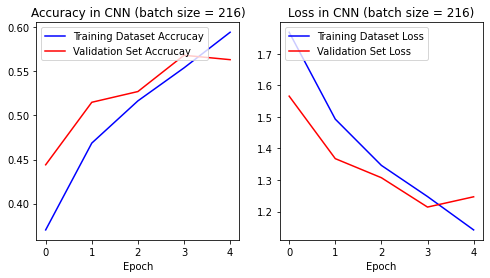

In [18]:
plotting_cnn(cnn1_history.history['accuracy'],cnn1_history.history['val_accuracy']
                 ,cnn1_history.history['loss'],cnn1_history.history['val_loss'],216,5)

In [19]:
score = CNN1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.271908164024353
Test accuracy: 0.5521000027656555


In [20]:
CNN2 = Sequential(name="Sequential_CNN2")

CNN2.add(Conv2D(32, kernel_size=(2, 2), 
               padding="same",
               activation="relu", input_shape=(32, 32, 3)))
CNN2.add(BatchNormalization())
CNN2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

CNN2.add(Conv2D(32, kernel_size=(2, 2),
               padding="same",
               activation="relu"))
CNN2.add(BatchNormalization())
CNN2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

CNN2.add(Flatten())

CNN2.add(Dense(300, activation='relu'))
CNN2.add(Dense(100, activation='relu'))
CNN2.add(Dense(10, activation='softmax'))

CNN2.summary()

Model: "Sequential_CNN2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        416       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 32)        4128      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                   

In [22]:
CNN2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
cnn2_history = CNN2.fit(x_train, y_train, epochs = 5, batch_size = 256, validation_data = (x_validation, y_validation))

Epoch 1/5
176/176 [==============================] - 63s 353ms/step - loss: 1.0332 - accuracy: 0.6334 - val_loss: 1.4403 - val_accuracy: 0.4842
Epoch 2/5
176/176 [==============================] - 64s 361ms/step - loss: 0.8800 - accuracy: 0.6913 - val_loss: 1.0905 - val_accuracy: 0.6132
Epoch 3/5
176/176 [==============================] - 63s 356ms/step - loss: 0.7571 - accuracy: 0.7342 - val_loss: 0.9954 - val_accuracy: 0.6502
Epoch 4/5
176/176 [==============================] - 64s 363ms/step - loss: 0.6583 - accuracy: 0.7704 - val_loss: 1.0311 - val_accuracy: 0.6570
Epoch 5/5
176/176 [==============================] - 63s 355ms/step - loss: 0.5555 - accuracy: 0.8060 - val_loss: 1.0126 - val_accuracy: 0.6716


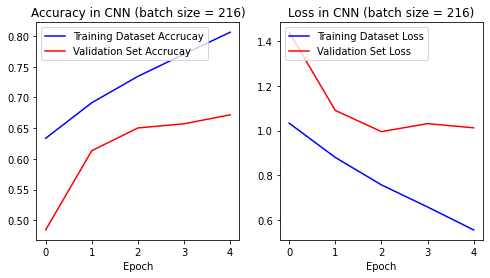

In [24]:
plotting_cnn(cnn2_history.history['accuracy'],cnn2_history.history['val_accuracy']
                 ,cnn2_history.history['loss'],cnn2_history.history['val_loss'],216,5)

In [25]:
score = CNN2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.084468960762024
Test accuracy: 0.6513000130653381


In [30]:
CNN3 = Sequential(name="Sequential_CNN3")

CNN3.add(Conv2D(32, kernel_size=(2, 2), 
               padding="same",
               activation="relu", input_shape=(32, 32, 3)))
CNN3.add(BatchNormalization())
CNN3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

CNN3.add(Conv2D(32, kernel_size=(2, 2),
               padding="same",
               activation="relu"))
CNN3.add(BatchNormalization())
CNN3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))
CNN3.add(Dropout(0.1))

CNN3.add(Flatten())

CNN3.add(Dense(300, activation='relu'))
CNN3.add(Dense(100, activation='relu'))
CNN3.add(Dropout(0.1))
CNN3.add(Dense(10, activation='softmax'))

CNN3.summary()

Model: "Sequential_CNN3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        416       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 32)        4128      
                                                                 
 batch_normalization_7 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                   

In [32]:
CNN3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
cnn3_history = CNN3.fit(x_train, y_train, epochs = 5, batch_size = 256, validation_data = (x_validation, y_validation))

Epoch 1/5
176/176 [==============================] - 93s 528ms/step - loss: 0.7978 - accuracy: 0.7165 - val_loss: 0.9122 - val_accuracy: 0.6866
Epoch 2/5
176/176 [==============================] - 66s 375ms/step - loss: 0.7363 - accuracy: 0.7368 - val_loss: 1.0123 - val_accuracy: 0.6614
Epoch 3/5
176/176 [==============================] - 65s 372ms/step - loss: 0.6741 - accuracy: 0.7608 - val_loss: 1.1090 - val_accuracy: 0.6346
Epoch 4/5
176/176 [==============================] - 64s 366ms/step - loss: 0.6138 - accuracy: 0.7823 - val_loss: 0.9102 - val_accuracy: 0.6838
Epoch 5/5
176/176 [==============================] - 63s 359ms/step - loss: 0.5534 - accuracy: 0.8030 - val_loss: 0.9508 - val_accuracy: 0.6842


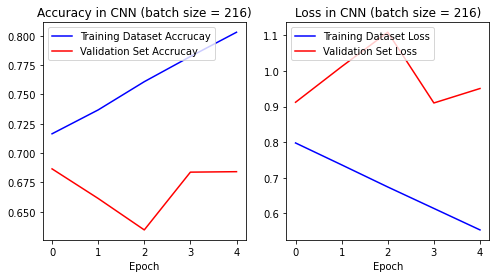

In [33]:
plotting_cnn(cnn3_history.history['accuracy'],cnn3_history.history['val_accuracy']
                 ,cnn3_history.history['loss'],cnn3_history.history['val_loss'],216,5)

In [35]:
score = CNN3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.005305528640747
Test accuracy: 0.6699000000953674


In [36]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
CNN3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
cnn4_history = CNN3.fit(x_train, y_train, epochs = 5, batch_size = 256, validation_data = (x_validation, y_validation),callbacks=[early_stopping])

Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


176/176 [==============================] - 70s 386ms/step - loss: 0.5053 - accuracy: 0.8208 - val_loss: 0.9179 - val_accuracy: 0.6996
Epoch 2/5
176/176 [==============================] - 67s 378ms/step - loss: 0.4575 - accuracy: 0.8364 - val_loss: 0.9984 - val_accuracy: 0.6830


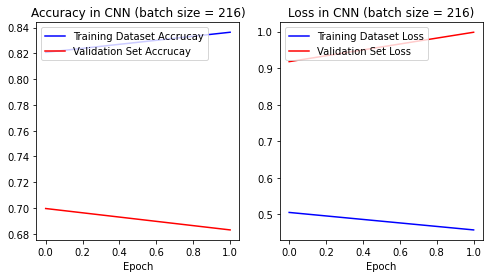

In [37]:
plotting_cnn(cnn4_history.history['accuracy'],cnn4_history.history['val_accuracy']
                 ,cnn4_history.history['loss'],cnn4_history.history['val_loss'],216,2)

In [38]:
score = CNN3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0330203771591187
Test accuracy: 0.6715999841690063
